In [ ]:
"""
-------------------------------------------------------
Author:  Shane Riley
ID:      170696320
Email:   rile6320@mylaurier.ca
Section: CP421
__updated__ = 2021-10-03
-------------------------------------------------------
"""

[13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
total: 809 n: 27 

[MEAN] = 29.962962962962962
[MEDIAN]: 25
[MODE]: 25 (4)
[MODE]: 35 (4)
Bimodal
[5NUM]: (13, 20 , 25, 35 , 52) 


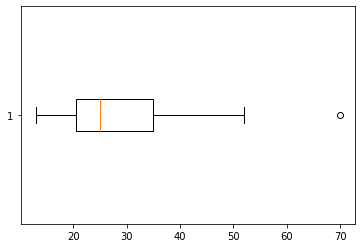

In [2]:
import matplotlib.pyplot as plt

def mean(lst, n):
    sum = 0
    for i in lst:
        sum += int(i)
    print(f'total: {sum} n: {n} \n\n[MEAN] = {sum/n}' )
    

def median(lst, n):
    med = 0

    if n%2 == 0:
        a = int(n/2 - 0.5)
        b = int(n/2 + 0.5)
        med = ( int(lst[a]) + int(lst[b]) ) / 2
    else:
        med = lst[int(n/2)]
    print(f'[MEDIAN]: {med}')
    
def mode(lst, n):
    counts = [[]]
    i = 0
    j = 0
    m = 0
    mx = 0
    s = False

    i = 0
    while i < n:
        j = 0
        s = False
        while j < m:
            #print(counts[j])
            if int(lst[i]) == counts[j][0]:
                #print(f' {lst[i]} {counts[j][0]}')
                counts[j][1] += 1
                if counts[j][1] > mx:
                    mx = counts[j][1]
                    #print(f' max: {mx}')
                    #i += 1
                    j = m
                s = True
            j += 1
        
        if s == False:
            if m == 0:
                counts[0] = [int(lst[i]), 1]
            else:
                counts.append([int(lst[i]), 1])
            #print(f' a {counts}')
            m += 1
            
            if counts[j][1] > mx:
                mx = counts[j][1]
                
                 
        i += 1
        
    #print(counts)
    modal = 0
    for i in counts:
        if i[1] == mx:
            modal += 1
            print(f'[MODE]: {i[0]} ({i[1]})')

    options = {0 : "Empty",
               1 : "Unimodal",
               2 : "Bimodal",
               3 : "Trimodal",
               4 : "Multimodal"}
    
    print(options.get(modal, 2))

def NUM5(lst, n):
    sum = 0
    med = 1
    o = open("age_val")
    for i in lst:
        sum += int(i)
    if n%2 == 0:     #even - split the 2
        a = int(n/2)-1  #using list numbering
        if (a+1)%2 == 0:
            q1a = int((a-1)/2)
            q1b = int(((a-1)/2) + 1)
            #print(f'{q1a} {q1b}')
            q1 = ( int(lst[q1a]) + int(lst[q1b]) ) / 2
        else:
            q1 = int(lst[int(((a)/2))])
        
        b = int(n/2)
        if (b)%2 == 0:
            q3a = int(n - (b / 2))
            q3b = int(n - (b / 2) - 0.5)
            q3 = ( int(lst[q3a]) + int(lst[q3b]) ) / 2
        else:
            q3 = int(lst[int(n-(b/2))])
            
        med = ( int(lst[a]) + int(lst[b]) ) / 2
    else:
        a = (n / 2) - 0.5
        med = int(lst[int(n/2)])
        q1 = int(lst[int(a / 2)])
        #print(q1)
        q3 = int(lst[int((n/2) + (a/2))])
    
    iqr = q3 - q1
    #print(f'IQR: {iqr}')
    mn = 0
    i = 0
    while(1):
        if lst[i] < q1 - 1.5*iqr:
            i += 1
        else:
            break
    mn = lst[i]
    
    mx = 0
    i = n-1
    while(1):
        if lst[i] > q3 + 1.5*iqr:
            i -= 1
        else:
            break
    mx = lst[i]
    
    print(f'[5NUM]: ({mn}, {q1} , {med}, {q3} , {mx}) ')
    
def main(): 
    lst = []
    o = open("age_val")
    n = 0
    for i in o.readline().split(","):        
        #print(f'{n}) {i}')
        n += 1
        lst.append(int(i))
    print(lst)
    mean(lst, n)
    median(lst, n)
    mode(lst, n)    
    NUM5(lst, n)
    plt.boxplot(lst, vert=False)
    plt.show()
    
    
main()


In [3]:
"""
-------------------------------------------------------
Author:  Shane Riley
ID:      170696320
Email:   rile6320@mylaurier.ca
Section: CP421
__updated__ = 2021-10-05
-------------------------------------------------------
"""
import numpy
def extract():
    o = open('sim_data.txt')
    lst = []
    r = o.readlines()
    for i in r:
        j = i.split(",")  
        k = j[1].split('\n')
        #print(j[0], k[0])
        lst.append([float(j[0]), float(k[0])])
    print(f'Data points: {lst}')
    return lst
    
def similarity(ls):
    x = input("Input new point (X,Y): ")
    xs = x.split(',');
    x = float(xs[0])
    y = float(xs[1])
    
    print("\nEuclidean Distance")
    n = 0
    for i in ls:
        euclid = numpy.sqrt( (x - i[0])**2 + (y - i[1])**2 )
        print("x{} | {:.3f}".format(n, euclid))
        n += 1
    
    #finds angle between vector 1 (0,0) to xi(A1, A2) and vector 2 (0,0) to input(X, Y)
    print("\nCosine Distance") 
    n = 0
    for i in ls:
        hyp1 = numpy.sqrt( (x)**2 + (y)**2 )
        hyp2 = numpy.sqrt( (i[0])**2 + (i[1])**2 )
        deg1 = numpy.arcsin( y / hyp1 )
        deg2 = numpy.arcsin( i[1] / hyp2 )
        deg = abs(deg2 - deg1)
        print("x{} | {:.3f}r  |  {:.3f}\N{DEGREE SIGN}".format(n, deg, deg*180 / numpy.pi))
        n += 1
ls = extract()
similarity(ls)

Data points: [[1.5, 1.7], [2.0, 1.9], [1.6, 1.8], [1.2, 1.5], [1.1, 1.0]]
Input new point (X,Y): 1.4,1.6

Euclidean Distance
x0 | 0.141
x1 | 0.671
x2 | 0.283
x3 | 0.224
x4 | 0.671

Cosine Distance
x0 | 0.004r  |  0.238°
x1 | 0.092r  |  5.283°
x2 | 0.008r  |  0.448°
x3 | 0.044r  |  2.526°
x4 | 0.114r  |  6.540°


In [4]:
"""
-------------------------------------------------------
Author:  Shane Riley
ID:      170696320
Email:   rile6320@mylaurier.ca
Section: CP421
__updated__ = 2021-10-04
-------------------------------------------------------
"""

def main():
    similarity()
    
def similarity():
    j = 0
    threshold = 5
    freq = [] 
    bucket = []
    item = []
    i = 1
    while i <= 100:
        bucket.append(i)
        item.append(i)
        i += 1
    #print(f'{bucket}\n{item}')
    j = 0
    print("Frequent:") 
    for b in bucket:
        lst = []
        for i in item:
            if b%i== 0:
                lst.append(i)
        if len(lst) > 5:
            freq.append((b, lst))
            print(f'   ({b})  {freq[j][1]}')
            j+=1
    print(f'\n   {j} numbers with {threshold} or more factors')
    #n = 0
    #while n < len(freq):
    #    print(freq[n][0], end=',')
    #    n += 1
        
main()

Frequent:
   (12)  [1, 2, 3, 4, 6, 12]
   (18)  [1, 2, 3, 6, 9, 18]
   (20)  [1, 2, 4, 5, 10, 20]
   (24)  [1, 2, 3, 4, 6, 8, 12, 24]
   (28)  [1, 2, 4, 7, 14, 28]
   (30)  [1, 2, 3, 5, 6, 10, 15, 30]
   (32)  [1, 2, 4, 8, 16, 32]
   (36)  [1, 2, 3, 4, 6, 9, 12, 18, 36]
   (40)  [1, 2, 4, 5, 8, 10, 20, 40]
   (42)  [1, 2, 3, 6, 7, 14, 21, 42]
   (44)  [1, 2, 4, 11, 22, 44]
   (45)  [1, 3, 5, 9, 15, 45]
   (48)  [1, 2, 3, 4, 6, 8, 12, 16, 24, 48]
   (50)  [1, 2, 5, 10, 25, 50]
   (52)  [1, 2, 4, 13, 26, 52]
   (54)  [1, 2, 3, 6, 9, 18, 27, 54]
   (56)  [1, 2, 4, 7, 8, 14, 28, 56]
   (60)  [1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30, 60]
   (63)  [1, 3, 7, 9, 21, 63]
   (64)  [1, 2, 4, 8, 16, 32, 64]
   (66)  [1, 2, 3, 6, 11, 22, 33, 66]
   (68)  [1, 2, 4, 17, 34, 68]
   (70)  [1, 2, 5, 7, 10, 14, 35, 70]
   (72)  [1, 2, 3, 4, 6, 8, 9, 12, 18, 24, 36, 72]
   (75)  [1, 3, 5, 15, 25, 75]
   (76)  [1, 2, 4, 19, 38, 76]
   (78)  [1, 2, 3, 6, 13, 26, 39, 78]
   (80)  [1, 2, 4, 5, 8, 10, 16, 20, 40,

In [ ]:
"""
-------------------------------------------------------
Author:  Shane Riley
ID:      170696320
Email:   rile6320@mylaurier.ca
Section: CP421
__updated__ = 2021-10-05
-------------------------------------------------------
"""

import numpy
def extract():
    o = open('crossselling.txt')
    lst = []
    r = o.readlines()
    for i in r:
        j = i.split(" ")
        ls = []
        for n in j:
            if n != '\n':
                ls.append(n)  
                #print(n)
            else:
                
                lst.append(ls)
                ls = []
    #h=0
    #for i in lst:
    #    print(f'Data{h}: {i}')
    #    h += 1
    return lst
    

def check(lst):
    support = 100
    k = 0
    freq = []
    count = [[]]
    cnt = []#[0,0,0]
    q=0

    while q < 11:
        count.append([])
        count[q].append([])
        q += 1

    print(count[1])
    c = 0
    vlst = []

    for i in lst:
        print(i)
        m = 0
        n = 1
        print("Reciept")
        while n < (len(i)):
            print('\n')
            #print(f'n{n} m{m} {len(i)}')
            print(f'[{i[m]}] [{i[n]}]')
            
            #count.append()

            j = 0
            n1 = []
            v1 = 0
            v2 = 0
            #print(f'iiiiii {i}')
            while j < len(i[0]):
                if i[m][j] != '':
                    #print(i[m][j])
                    v1 = ord(i[m][j])
                    #n1 = i[m][j]
                    #print(f'v1 {v1*(2**float(j))}')
                    
                
                if i[n][j] != '':
                    if i[n][j].isdigit():
                        v2 = int(i[n][j])
                    
                    else:
                        v2 = ord(i[n][j])
                    #print(f'{i[n][j]}, {v2}')
                    #n2 = i[n][j]
                    #print(f'v2 {v2*(2**float(j))}')
                vlst.append([v1*(2**(8-j)), v2*(2**(8-j))])
                sum1 = 0
                sum2 = 0
                for k in vlst:
                    sum1 += k[0]
                    sum2 += k[1]
                
                j += 1
            
            h = hash((sum1-sum2), len(count))
            
            #print(n1, h)
            if not count[h][0]:
                print(f'List Index({h}) Open\n')
                c += 1
                count[h][0] = [sum1, sum2, 1]
                #print(count[h])
            else:
                #print(f'COLLISION {h}')
                print(f'[{sum1}] + [{sum2}] = {sum1-sum2} % {len(count)} = {(sum1-sum2) % len(count)}\nCOLLISION INDX[{(sum1-sum2) % len(count)}/{len(count)}]')    #"hashed" items. Sum1 + Sum2 % len(vlst)
                print(f'New item: {sum1}, {sum2}')
                found = False
                for p in count[h]:
                    print(f'Existing: {p[0]}, {p[1]}')
                    #print(i[0])
                    print(f'P({p[0]})==SUM({sum1})  P({p[1]})==SUM({sum2})')
                    if ((p[0] == sum1 and p[1] == sum2) or (p[1] == sum1 and p[0] == sum2)):
                        found = True
                        p[2] += 1
                        
                        print(found)
                        print("Match found\n")
                if found == False:
                    #unhash(sum1)
                    count[h].append([sum1, sum2, 1])    
                    c += 1            
                    print("No Match\n")
            
            
            if c/len(count) >= 0.7:
                count, c = rehash(count, len(count))
                print(count)
            #for e in count:
            #print(f'{count}')
            #print(i[m], i[n])
            #print(f'[{count}]')
            print("{} / {} = {:.2f}% full".format(c, len(count), (c/len(count))*100))
            n += 1
            #print(n, len(i))
            if n == len(i):
                #print(True)
                m += 1
                n = m + 1
        print("\n")
        for e in count:
            print(e)
        #print(f'ORDER: {freq}')
        
def rehash(count, c):   
    #print(c, count)
    print("REHASHING...")
    n = 0
    new = []
    q=0
    #print(new)
    while q < (2*c)-1:
        new.append([])
        new[q].append([])
        q += 1
    #print(new)
    for i in count:
        #print(i)
        for k in i:
            if k == []:
                break
            #print(f'\n{k}') NEW tuple to add
            h = hash((k[0]+k[1]),(2*c))

            if not new[h][0]:  #if the list at h is currently empty
                print(f'NO COLLISION ({h})\n')
                n += 1
                new[h][0] = k
                #print(new)
                
            else:           #if the list at h is not empty
                print(f'REHASH COLLISION({h})')
                found = False
                u = 0
                #print(new[h])
                print(f'Existing: {k[0]}, {k[1]}')
                
                for p in new[h]:    #checking each tuple in count[h]
                    print(f'List({u}): {p[0]}, {p[1]}')
                    if ((p[0] == k[0] and p[1] == k[1]) or (p[0] == k[1] and p[1] == k[0])):    #checking the actual values 
                        found = True
                        p[2] += 1
                        #new[h][u][2] += 1
                        print(f'\n\n\n\n\n\n\n\nCount {new[h][u][2]}\n\n\n\n\n\n\\n\n\n\n')
                        #time.sleep(15)
                    u += 1
                if found == False:
                    print("No matches\n")
                    new[h].append(k)    
                    #print(f'{new[h]}')
                    n += 1
                          
                
    #print(n, new)
    print("...FINISHED REHASHING.")
    return new, n

        
def hash(val, l):
    #print("hashing")
    return val % l
    
lst = extract() 
check(lst) 